# Imports

In [3]:
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

# Generating the Dataset

In [8]:
def synthetic_data(w, b, num_examples):
    x = tf.zeros((num_examples, w.shape[0]))
    x += tf.random.normal(shape=x.shape)
    y = tf.matmul(x, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return x, y

In [9]:
true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [10]:
print('Features: ',features[0], '\nLabel: ', labels[0])

Features:  tf.Tensor([0.4612996 1.0875506], shape=(2,), dtype=float32) 
Label:  tf.Tensor([1.4208896], shape=(1,), dtype=float32)


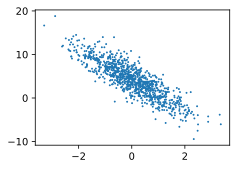

In [11]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

# Reading the dataset

In [15]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i:min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [17]:
batch_size = 10
for x, y in data_iter(batch_size, features, labels):
    print(x, '\n', y)
    break

tf.Tensor(
[[-3.0192218   0.89670813]
 [ 0.20221126 -0.07924029]
 [ 2.2941155  -0.14133543]
 [ 1.1782908  -1.046517  ]
 [-0.30836692 -1.2040583 ]
 [ 1.7643213   0.67308956]
 [ 0.55964375  0.7903726 ]
 [-0.7482742   0.44577232]
 [ 0.15791146  0.29923514]
 [-0.912509    1.1823461 ]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[-4.8763084]
 [ 4.8774467]
 [ 9.2755575]
 [10.100619 ]
 [ 7.6914577]
 [ 5.4379034]
 [ 2.6158264]
 [ 1.1925559]
 [ 3.5201683]
 [-1.6559954]], shape=(10, 1), dtype=float32)


# Initialize the model parameters 

In [18]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
               trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

# Defining the Model 

In [19]:
def linreg(X, w, b):
    # linear regression model
    return tf.matmul(X, w) + b

# Defining the Loss Function 

In [26]:
def squared_loss(y_hat, y):
    # squared loss
    return (y_hat - tf.reshape(y, y_hat.shape))**2 / 2

# Defining the Optimization Algorithm 

In [30]:
def sgd(params, grads, lr, batch_size):
    # minibatch stochastic gradient descent
    for param, grad in zip(params, grads):
        param.assign_sub(lr * grad / batch_size)

# Training

In [31]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [32]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y) # minibatch loss in x and y
        # compute gradient on l with respect to [w, b]
        dw, db = g.gradient(l, [w, b])
        # update parameters using theie gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.037308
epoch 2, loss 0.000130
epoch 3, loss 0.000050


In [33]:
print(f'Error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'Error in estimating b: {true_b - b}')

Error in estimating w: [-6.4373016e-05 -2.1219254e-05]
Error in estimating b: [0.00050259]
